In [2]:
%matplotlib inline
import time
import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2
import TTM_analysis_utils as TTMUtil

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
print("Paths:")
for k,v in paths.path.items():
    print(" path.%s: %s" % (k,v))
    
import glob
from collections import OrderedDict

debug = False
legacy = False

Paths:
 path.data_root: /Users/trafferty/data
 path.notebook_root: /Users/trafferty/data/notebooks
 path.scripts_root: /Users/trafferty/data/scripts
 path.images_root: /Users/trafferty/data/images
 path.projects_root: /Users/trafferty/data/projects
 path.results_root: /Users/trafferty/data/results
 path.tmp_root: /Users/trafferty/data/tmp
 path.dat_root: /Users/trafferty/data/dat
 path.tmp_dir: /Users/trafferty/tmp
 path.ws_dir: /Users/trafferty/workspace
 path.mii_home: /Users/trafferty/dev
 path.inhouse: /Users/trafferty/dev/src/inhouse


In [4]:
trace_file_lst = [
'./trace_file_template/template.114207/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114208/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114209/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114210/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114211/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114212/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114213/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114214/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114215/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114216/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114217/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114218/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114219/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114220/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114221/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114222/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114223/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114224/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114225/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114226/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114227/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114228/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114229/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114230/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114231/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114232/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114233/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114234/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114235/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114236/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114237/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114238/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114239/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114240/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114241/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114242/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114243/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114244/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114245/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114246/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114247/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114248/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114249/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114250/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114251/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114252/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114253/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114254/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114255/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114256/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114257/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114258/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114259/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114260/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114261/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114262/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114263/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114264/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114265/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114266/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114267/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114268/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114269/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114270/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114271/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114272/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114273/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114274/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114275/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114276/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114277/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114278/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114279/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114280/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114281/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114282/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114283/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114284/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114285/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114286/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114287/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114288/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114289/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114290/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114291/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114292/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114293/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114294/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114295/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114296/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114297/wafer.1/imprint.1/TTMLogStream.1',
'./trace_file_template/template.114298/wafer.1/imprint.1/TTMLogStream.1']
print("num files: ", len(trace_file_lst))

num files:  92


In [3]:
# build path list from stat tree:

TTMStream_data = OrderedDict()

#base_path = '%s/TTM_Vibration/trace_file_template' % (paths.tmp_dir)
base_path = '%s/NZ2-DS2_stat' % (paths.tmp_dir)

wafer_id = 1
imprint_id = 12

path_list = glob.glob('%s/template.*' % (base_path)) 

for name in path_list:
    template_id = int(name[name.rfind('.')+1:])
    TTMLogStream_path = '%s/wafer.%d/imprint.%d/TTMLogStream.1' % (name, wafer_id, imprint_id)    
    data19_path = '%s/wafer.%d/imprint.%d/data19.1' % (name, wafer_id, imprint_id)    
    with open(data19_path, 'rb') as data19_file:
        data19_file.seek(3*128)
        x_mm = np.frombuffer(data19_file.read(8), dtype=np.float64)[0]
        y_mm = np.frombuffer(data19_file.read(8), dtype=np.float64)[0]
    if True: print( template_id, "=", (TTMLogStream_path, (x_mm, y_mm)) )
    TTMStream_data[template_id] = (TTMLogStream_path, (x_mm, y_mm))

print("num files: ", len(TTMStream_data))

63440 = ('/Users/trafferty/tmp/NZ2-DS2_stat/template.63440/wafer.1/imprint.12/TTMLogStream.1', (38.934, 98.868))
num files:  1


In [4]:
TTMStream_data

OrderedDict([(63440,
              ('/Users/trafferty/tmp/NZ2-DS2_stat/template.63440/wafer.1/imprint.12/TTMLogStream.1',
               (38.934, 98.868)))])

In [5]:
from os.path import expanduser

tmp_dir = '%s/tmp' % (expanduser("~"))
ws_dir = '%s/workspace' % (expanduser("~"))

# new way (UDP):
#legacy, fname = False, '%s/TTM_Vibration/template.34811/wafer.1/imprint.1/TTMLogStream.1' % (tmp_dir)

# just grab the first item in the dict. (could also grab by template_id, ie: data = TTMStream_data[114294])
template_id, data = list(TTMStream_data.items())[0]
legacy, fname = False, data[0]

## old way (TCP)
#legacy, fname = False, '%s/stats/template.31159/wafer.1/imprint.1/TTMLogStream.1' % (ws_dir)
#legacy, fname = True, '%s/TTMLogStream_TEST.csv' % (tmp_dir)

f = open(fname, 'r')
ttm = f.readlines()
f.close()
print("Unfiltered len:", len(ttm))

ttm[:] = [element for element in ttm if TTMUtil.include_element(element)]

print("Filtered len  :", len(ttm))

Unfiltered len: 389
Filtered len  : 389


In [6]:
ttm[0]

'doTTMClientWork: 2019-06-18 15:44:36.773, 2.54749, 84, 2219, 0, 79, 760327, 344767, 474054, 924, 111, 2e-06, 0, 0.0001351, 0, 0.000101, 0, 9.8e-05, 0, 0, 0, p, 2e-06, 0.0001351, 0.000101, 9.8e-05, 222, 9.9e-06, 0, 0.0002208, 0, 2.3e-05, 0, 0.000276, 0, 0, 0, p, 9.9e-06, 0.0002208, 2.3e-05, 0.000276, 333, -7.87e-05, 0, 0.0002318, 0, -9.9e-05, 0, 0.00032, 0, 0, 0, p, -7.87e-05, 0.0002318, -9.9e-05, 0.00032, 444, -8.05e-05, 0, 0.0001394, 0, -0.000126, 0, 7.5e-05, 0, 0, 0, p, -8.05e-05, 0.0001394, -0.000126, 7.5e-05\n'

In [43]:
ds_keys_2017_05_17_19 = [
    (30167, 'Good'),(30169, 'Good'),(30170, 'Good'),(30171, 'Good'),(30172, 'Good'),
    (30173, 'Vibration'),
    (30174, 'Good'),(30175, 'Good'),(30176, 'Good'),(30177, 'Good'),(30178, 'Good'),(30179, 'Good'),(30179, 'Good'),
    (30179, 'Good'),(30184, 'Good'),(30186, 'Good'),(30188, 'Good'),(30190, 'Good'),(30192, 'Good'),(30194, 'Good'),
    (30196, 'Good'),(30198, 'Good'),
    (30271, 'Spike'),
    (30273, 'Good'),(30275, 'Good'),(30277, 'Good'),
    (30279, 'Spike'),
    (30281, 'Good'),(30283, 'Good'),(30285, 'Good')
]

ds_keys_latest = [
    (31159, 'Good'),
    (31157, 'Spike')
]

ds_keys = ds_keys_2017_05_17_19

In [14]:
numCams = 4
cols, col_ids = TTMUtil.define_columns_and_ids(numCams, legacy)

print("cols:", cols)
print("\ncol_ids:", col_ids)

cols: ['TS', 'time_s', 'time_offset_s', 'numread', 'TTMNumComplete', 'TTMNumPartial', 'TTM_SerialNum', 'Cam1_TimeStamp', 'Cam2_TimeStamp', 'Cam3_TimeStamp', 'Cam4_TimeStamp', 'C0 measx_mm', 'C0 scorex', 'C0 measy_mm', 'C0 scorey', 'C0 cmeasx_mm', 'C0 cscorex', 'C0 cmeasy_mm', 'C0 cscorey', 'C0 x unwrap cnt', 'C0 y unwrap cnt', 'C0 post measx_mm', 'C0 post measy_mm', 'C0 post cmeasx_mm', 'C0 post cmeasy_mm', 'C1 measx_mm', 'C1 scorex', 'C1 measy_mm', 'C1 scorey', 'C1 cmeasx_mm', 'C1 cscorex', 'C1 cmeasy_mm', 'C1 cscorey', 'C1 x unwrap cnt', 'C1 y unwrap cnt', 'C1 post measx_mm', 'C1 post measy_mm', 'C1 post cmeasx_mm', 'C1 post cmeasy_mm', 'C2 measx_mm', 'C2 scorex', 'C2 measy_mm', 'C2 scorey', 'C2 cmeasx_mm', 'C2 cscorex', 'C2 cmeasy_mm', 'C2 cscorey', 'C2 x unwrap cnt', 'C2 y unwrap cnt', 'C2 post measx_mm', 'C2 post measy_mm', 'C2 post cmeasx_mm', 'C2 post cmeasy_mm', 'C3 measx_mm', 'C3 scorex', 'C3 measy_mm', 'C3 scorey', 'C3 cmeasx_mm', 'C3 cscorex', 'C3 cmeasy_mm', 'C3 cscorey', '

In [15]:
data_ranges, data_sets_rough = TTMUtil.parse_into_data_sets(ttm)

Data set 0, range: 0 - 388 (total: 388)
[0] range: doTTMClientWork: 2019-06-18 15:44:36.773 -> doTTMClientWork: 2019-06-18 15:44:38.747


In [16]:
v= TTMUtil.validate_columns_rough(data_sets_rough)
print( "For rough data, column_cnt: num_records", v)

For rough data, column_cnt: num_records {73: 388}


In [17]:
data_sets = []
for idx, data_set in enumerate(data_sets_rough):
    data_sets.append(TTMUtil.cleanup_and_format_data_set(data_set, legacy))

In [18]:
v= TTMUtil.validate_columns_cleanedup(data_sets)
print( "For cleaned-up data, column_cnt: num_records", v)

For cleaned-up data, column_cnt: num_records {67: 388}


In [19]:
ds = data_sets[0]  #Xiaoming thinks this one had spike...

# for col_id in col_ids.keys():
#     print("%s [%d]: %s" % (col_id, col_ids[col_id], str(ds[15][4][col_ids[col_id]])))
#     #print("%s: " % (col_id))
count =len(ds)
print("count:", count)

# for idx, ds in enumerate(data_sets):
#     print("[%d] len: %d" %(idx, len(ds)))

count: 388


In [20]:
len(ds)
    
#[col_ids['C0 scorex']]

388

In [21]:
for idx, ds in enumerate(data_sets):
    validx = {0:0, 1:0, 2:0, 3:0, 4:0}
    validy = {0:0, 1:0, 2:0, 3:0, 4:0}
    validx_records = []
    validy_records = []
    for d in ds:
        x = 4-(d[col_ids['C0 cscorex']] + d[col_ids['C1 cscorex']] + d[col_ids['C2 cscorex']] + d[col_ids['C3 cscorex']])
        if x not in validx:
            validx[x] = 0
        else:
            validx[x] += 1

        y = 4-(d[col_ids['C0 cscorey']] + d[col_ids['C1 cscorey']] + d[col_ids['C2 cscorey']] + d[col_ids['C3 cscorey']])
        if y not in validy:
            validy[y] = 0
        else:
            validy[y] += 1

    df = pd.DataFrame.from_records(ds, columns=cols)
    df_c0x = df['C0 post measx_mm']
    df_c0y = df['C0 post measy_mm']
    df_c1x = df['C1 post measx_mm']
    df_c1y = df['C1 post measy_mm']
    df_c2x = df['C2 post measx_mm']
    df_c2y = df['C2 post measy_mm']
    df_c3x = df['C3 post measx_mm']
    df_c3y = df['C3 post measy_mm']

    #     if d[col_ids['C0 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C1 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C2 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C3 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C0 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C1 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C2 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C3 cscorey']] == 0: validy_cnt += 1
    
    print("-------------------------------------------------")
    print("Dataset num: %d, template: %d, XLu's note: %s" % (idx, ds_keys[idx][0], ds_keys[idx][1]))
    print("valid x cnts:", validx)
    print("valid y cnts:", validy)
    print("C0 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0x.min(), df_c0x.max(), df_c0x.mean(),df_c0x.std()))
    print("C0 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0y.min(), df_c0y.max(), df_c0y.mean(),df_c0y.std()))
    print("C1 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1x.min(), df_c1x.max(), df_c1x.mean(),df_c1x.std()))
    print("C1 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1y.min(), df_c1y.max(), df_c1y.mean(),df_c1y.std()))
    print("C2 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2x.min(), df_c2x.max(), df_c2x.mean(),df_c2x.std()))
    print("C2 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2y.min(), df_c2y.max(), df_c2y.mean(),df_c2y.std()))
    print("C3 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3x.min(), df_c3x.max(), df_c3x.mean(),df_c3x.std()))
    print("C3 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3y.min(), df_c3y.max(), df_c3y.mean(),df_c3y.std()))


-------------------------------------------------


NameError: name 'ds_keys' is not defined

('TS', 0), ('time_s', 1), ('time_offset_s', 2), ('numread', 3), ('TTMNumComplete', 4), ('TTMNumPartial', 5), 

('TTM_SerialNum', 6), ('Cam1_TimeStamp', 7), ('Cam2_TimeStamp', 8), ('Cam3_TimeStamp', 9), ('Cam4_TimeStamp', 10), 

('C0 measx_mm', 11), ('C0 scorex', 12), ('C0 measy_mm', 13), ('C0 scorey', 14), ('C0 cmeasx_mm', 15), ('C0 cscorex', 16), ('C0 cmeasy_mm', 17), ('C0 cscorey', 18), ('C0 x unwrap cnt', 19), ('C0 y unwrap cnt', 20), ('C0 post measx_mm', 21), ('C0 post measy_mm', 22), ('C0 post cmeasx_mm', 23), ('C0 post cmeasy_mm', 24), 

('C1 measx_mm', 25), ('C1 scorex', 26), ('C1 measy_mm', 27), ('C1 scorey', 28), ('C1 cmeasx_mm', 29), ('C1 cscorex', 30), ('C1 cmeasy_mm', 31), ('C1 cscorey', 32), ('C1 x unwrap cnt', 33), ('C1 y unwrap cnt', 34), ('C1 post measx_mm', 35), ('C1 post measy_mm', 36), ('C1 post cmeasx_mm', 37), ('C1 post cmeasy_mm', 38), 

('C2 measx_mm', 39), ('C2 scorex', 40), ('C2 measy_mm', 41), ('C2 scorey', 42), ('C2 cmeasx_mm', 43), ('C2 cscorex', 44), ('C2 cmeasy_mm', 45), ('C2 cscorey', 46), ('C2 x unwrap cnt', 47), ('C2 y unwrap cnt', 48), ('C2 post measx_mm', 49), ('C2 post measy_mm', 50), ('C2 post cmeasx_mm', 51), ('C2 post cmeasy_mm', 52), 

('C3 measx_mm', 53), ('C3 scorex', 54), ('C3 measy_mm', 55), ('C3 scorey', 56), ('C3 cmeasx_mm', 57), ('C3 cscorex', 58), ('C3 cmeasy_mm', 59), ('C3 cscorey', 60), ('C3 x unwrap cnt', 61), ('C3 y unwrap cnt', 62), ('C3 post measx_mm', 63), ('C3 post measy_mm', 64), ('C3 post cmeasx_mm', 65), ('C3 post cmeasy_mm', 66)

In [23]:
def plot_series(df, title_str, query_str, save_pdf):
    df_sub = df.query(query_str)
    
    df_labels = [
        ('Cam 0 - X', 'C0 post measx_mm', 'C0 cmeasx_mm','C0 measx_mm','C0 scorex','C0 cscorex'),
        ('Cam 0 - Y', 'C0 post measy_mm', 'C0 cmeasy_mm','C0 measy_mm','C0 scorey','C0 cscorey'),
        ('Cam 1 - X', 'C1 post measx_mm', 'C1 cmeasx_mm','C1 measx_mm','C1 scorex','C1 cscorex'),
        ('Cam 1 - Y', 'C1 post measy_mm', 'C1 cmeasy_mm','C1 measy_mm','C1 scorey','C1 cscorey'),
        ('Cam 2 - X', 'C2 post measx_mm', 'C2 cmeasx_mm','C2 measx_mm','C2 scorex','C2 cscorex'),
        ('Cam 2 - Y', 'C2 post measy_mm', 'C2 cmeasy_mm','C2 measy_mm','C2 scorey','C2 cscorey'),
        ('Cam 3 - X', 'C3 post measx_mm', 'C3 cmeasx_mm','C3 measx_mm','C3 scorex','C3 cscorex'),
        ('Cam 3 - Y', 'C3 post measy_mm', 'C3 cmeasy_mm','C3 measy_mm','C3 scorey','C3 cscorey')
    ]

    if save_pdf:
        plot_file_pdf = "%s/%s.pdf" % (tmp_dir, title_str)
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages(plot_file_pdf)
        # set the file's metadata via the PdfPages object:
        d = pdf.infodict() 
        d['Title'] = title_str
        d['Author'] = 'Tom Rafferty'
        d['Subject'] = 'TTM CanonLan Interface Analysis'
        d['CreationDate'] = datetime.datetime.today()
        d['ModDate'] = datetime.datetime.today()
        
        # setup vars to control page layout
        num_plots = len(df_labels)
        plots_per_page = num_plots
        num_pages = np.ceil(num_plots / plots_per_page)
        nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
        grid_size = (plots_per_page, 1)

        print("Creating PDF (%s) with %d pages." % (plot_file_pdf, num_pages))
        print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))
    
    #fig = plt.figure(figsize=(18,3))
    fig, axes = plt.subplots(nrows=plots_per_page, ncols=1, squeeze=True, figsize=(18,(4*plots_per_page)))
    
    for label_num, df_label in enumerate(df_labels):
        time_s = df_sub['time_s']
        post_meas = df_sub[df_label[1]]
        cmeas = df_sub[df_label[2]]
        meas = df_sub[df_label[3]]
        score = (df_sub[df_label[4]] + df_sub[df_label[5]]) / 100

        print(" ...Plotting series %d of %d" % (label_num+1, num_plots))
    #     print(len(df_col))
    #     print(len(time_s))

        delta_s = [0]
        for idx, d in enumerate(time_s):
            if idx > 0:
                delta_s.append(abs(d - d_prev))
            d_prev = d
        
        #fig, ax1 = plt.subplots(figsize=(18,3))
        #plt.subplot(num_plots,1,label_num+1)
        #ax1 = plt.gca()        
        ax1 = axes[label_num]
        
        ax1.plot(time_s, cmeas,  color='b', label='coarse')
        ax1.plot(time_s, post_meas,  color='g', label='post_meas')
        ax1.set_xlabel('time (s)')
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('cmeas, meas', color='b')
        ax1.tick_params('y', colors='b')
        ax1.set_title("%s - %s" % (title_str, df_label[0]))

        ax2 = ax1.twinx()
        ax2.plot(time_s, score,  color='m', label='score')
        ax2.plot(time_s, delta_s,  color='c', label='delta_s')
        ax2.set_ylabel('score, delta_s', color='m')
        ax2.tick_params('y', colors='m')

        leg1 = ax1.legend(loc='upper left', shadow=True)
        leg2 = ax2.legend(loc='upper right', shadow=True)
    
    plt.title(title_str)
    plt.tight_layout()
    plt.show()
                    
    if save_pdf:
#         for fig in figs:
#             fig.savefig(pdf, format='pdf')
        print("Saving pdf...")
        fig.savefig(pdf, format='pdf')
        pdf.close()


Creating PDF (/Users/trafferty/tmp/63440.pdf) with 1 pages.
Total plots: 8, plots per page: 8
 ...Plotting series 1 of 8
 ...Plotting series 2 of 8
 ...Plotting series 3 of 8
 ...Plotting series 4 of 8
 ...Plotting series 5 of 8
 ...Plotting series 6 of 8
 ...Plotting series 7 of 8
 ...Plotting series 8 of 8


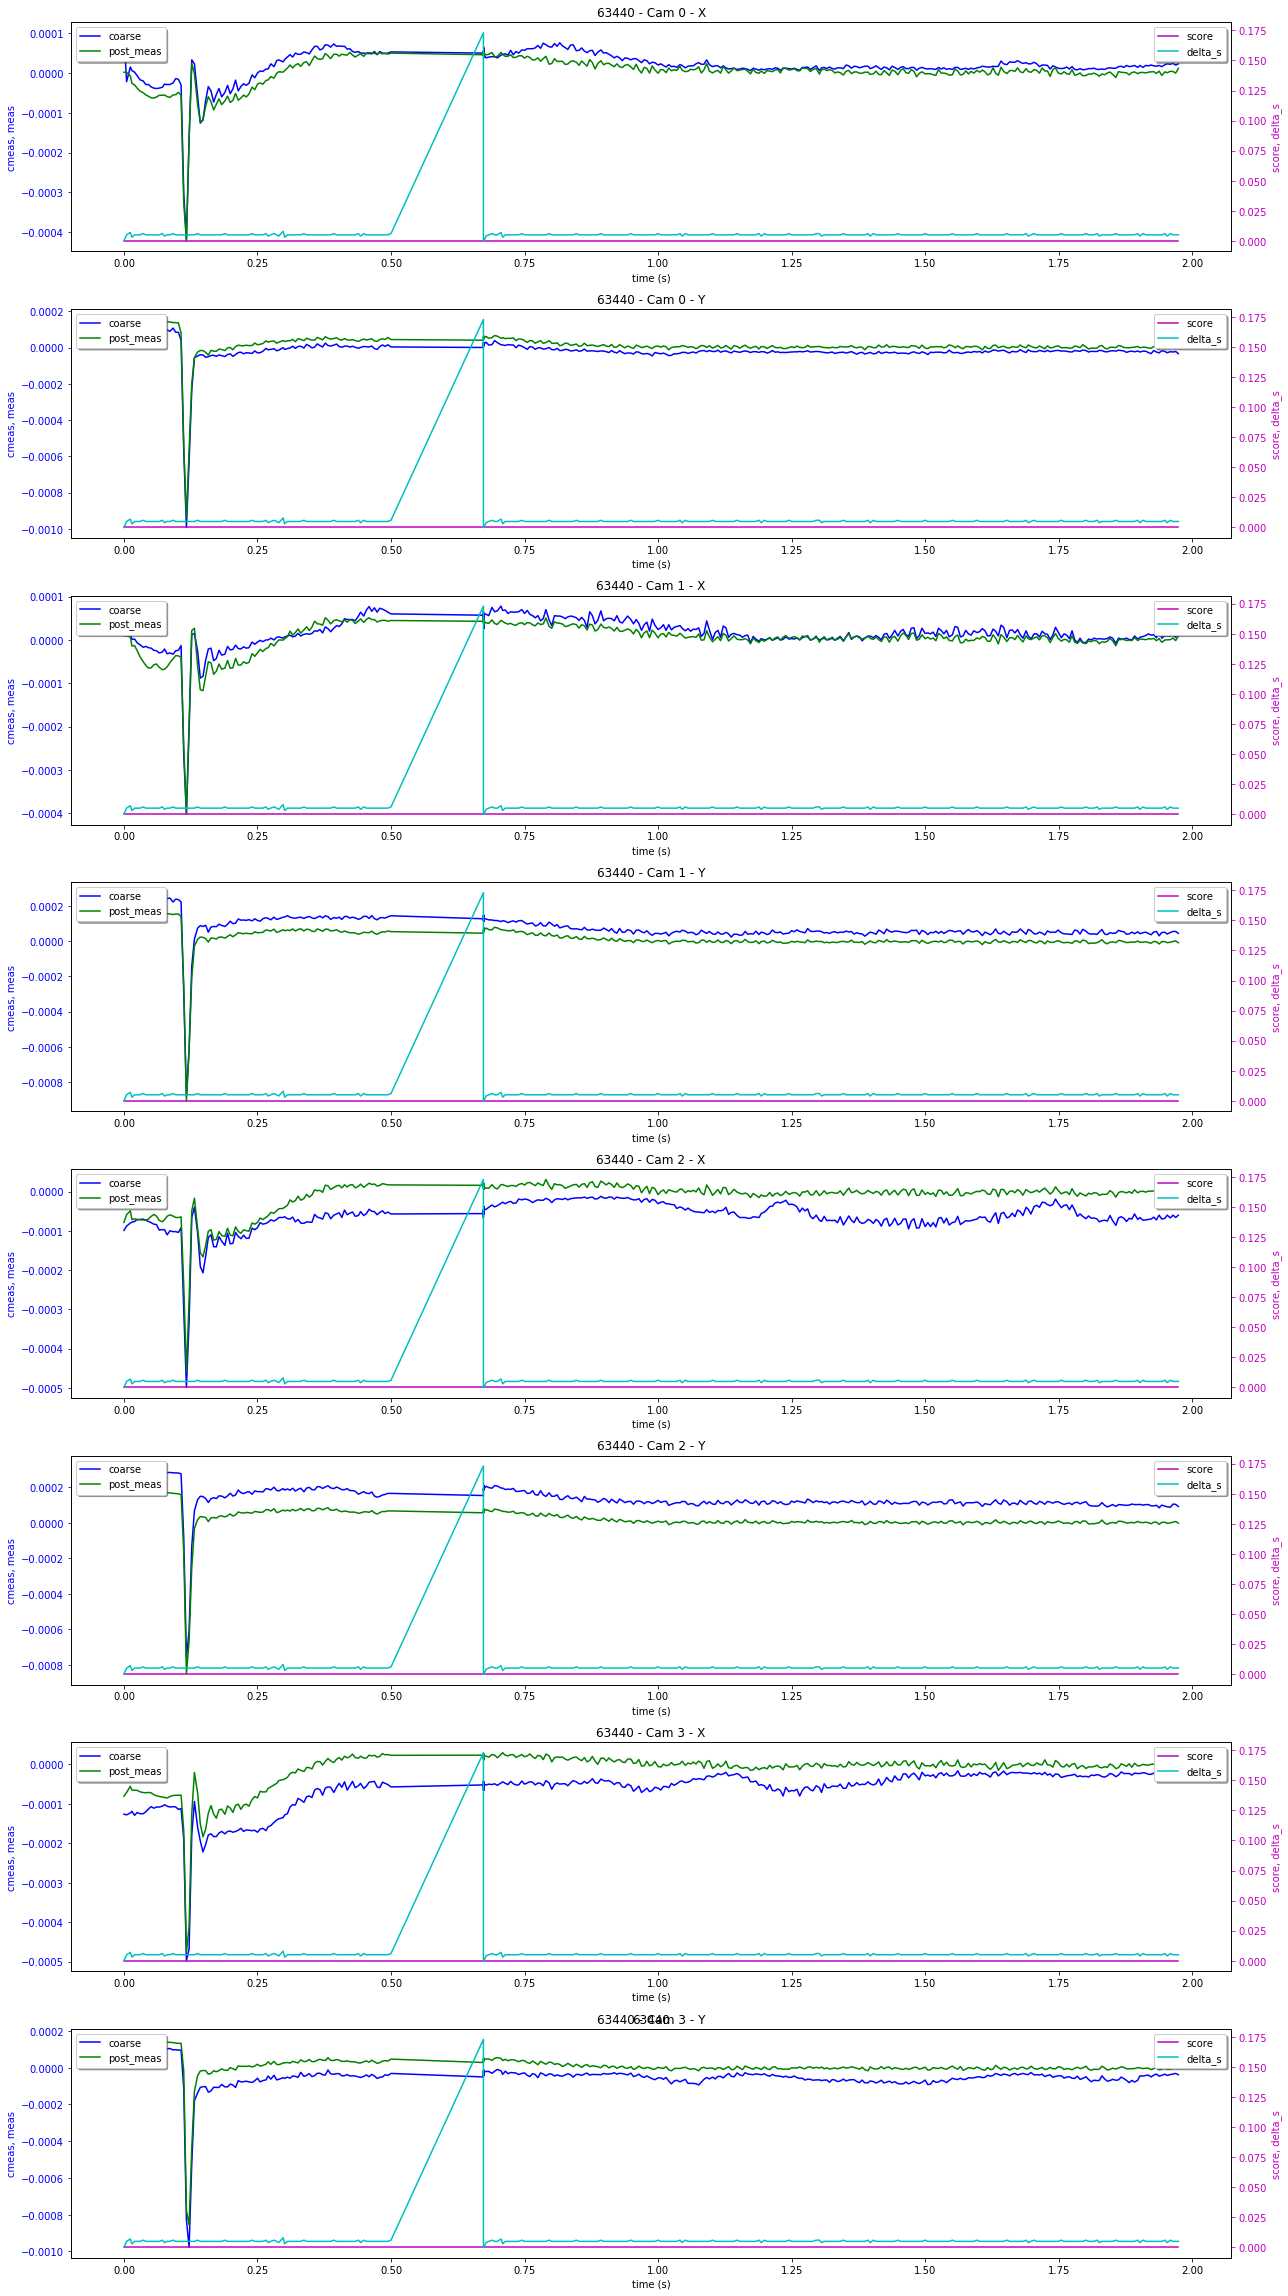

Saving pdf...
Creating PDF (/Users/trafferty/tmp/63440.pdf) with 1 pages.
Total plots: 8, plots per page: 8
 ...Plotting series 1 of 8
 ...Plotting series 2 of 8
 ...Plotting series 3 of 8
 ...Plotting series 4 of 8
 ...Plotting series 5 of 8
 ...Plotting series 6 of 8
 ...Plotting series 7 of 8
 ...Plotting series 8 of 8


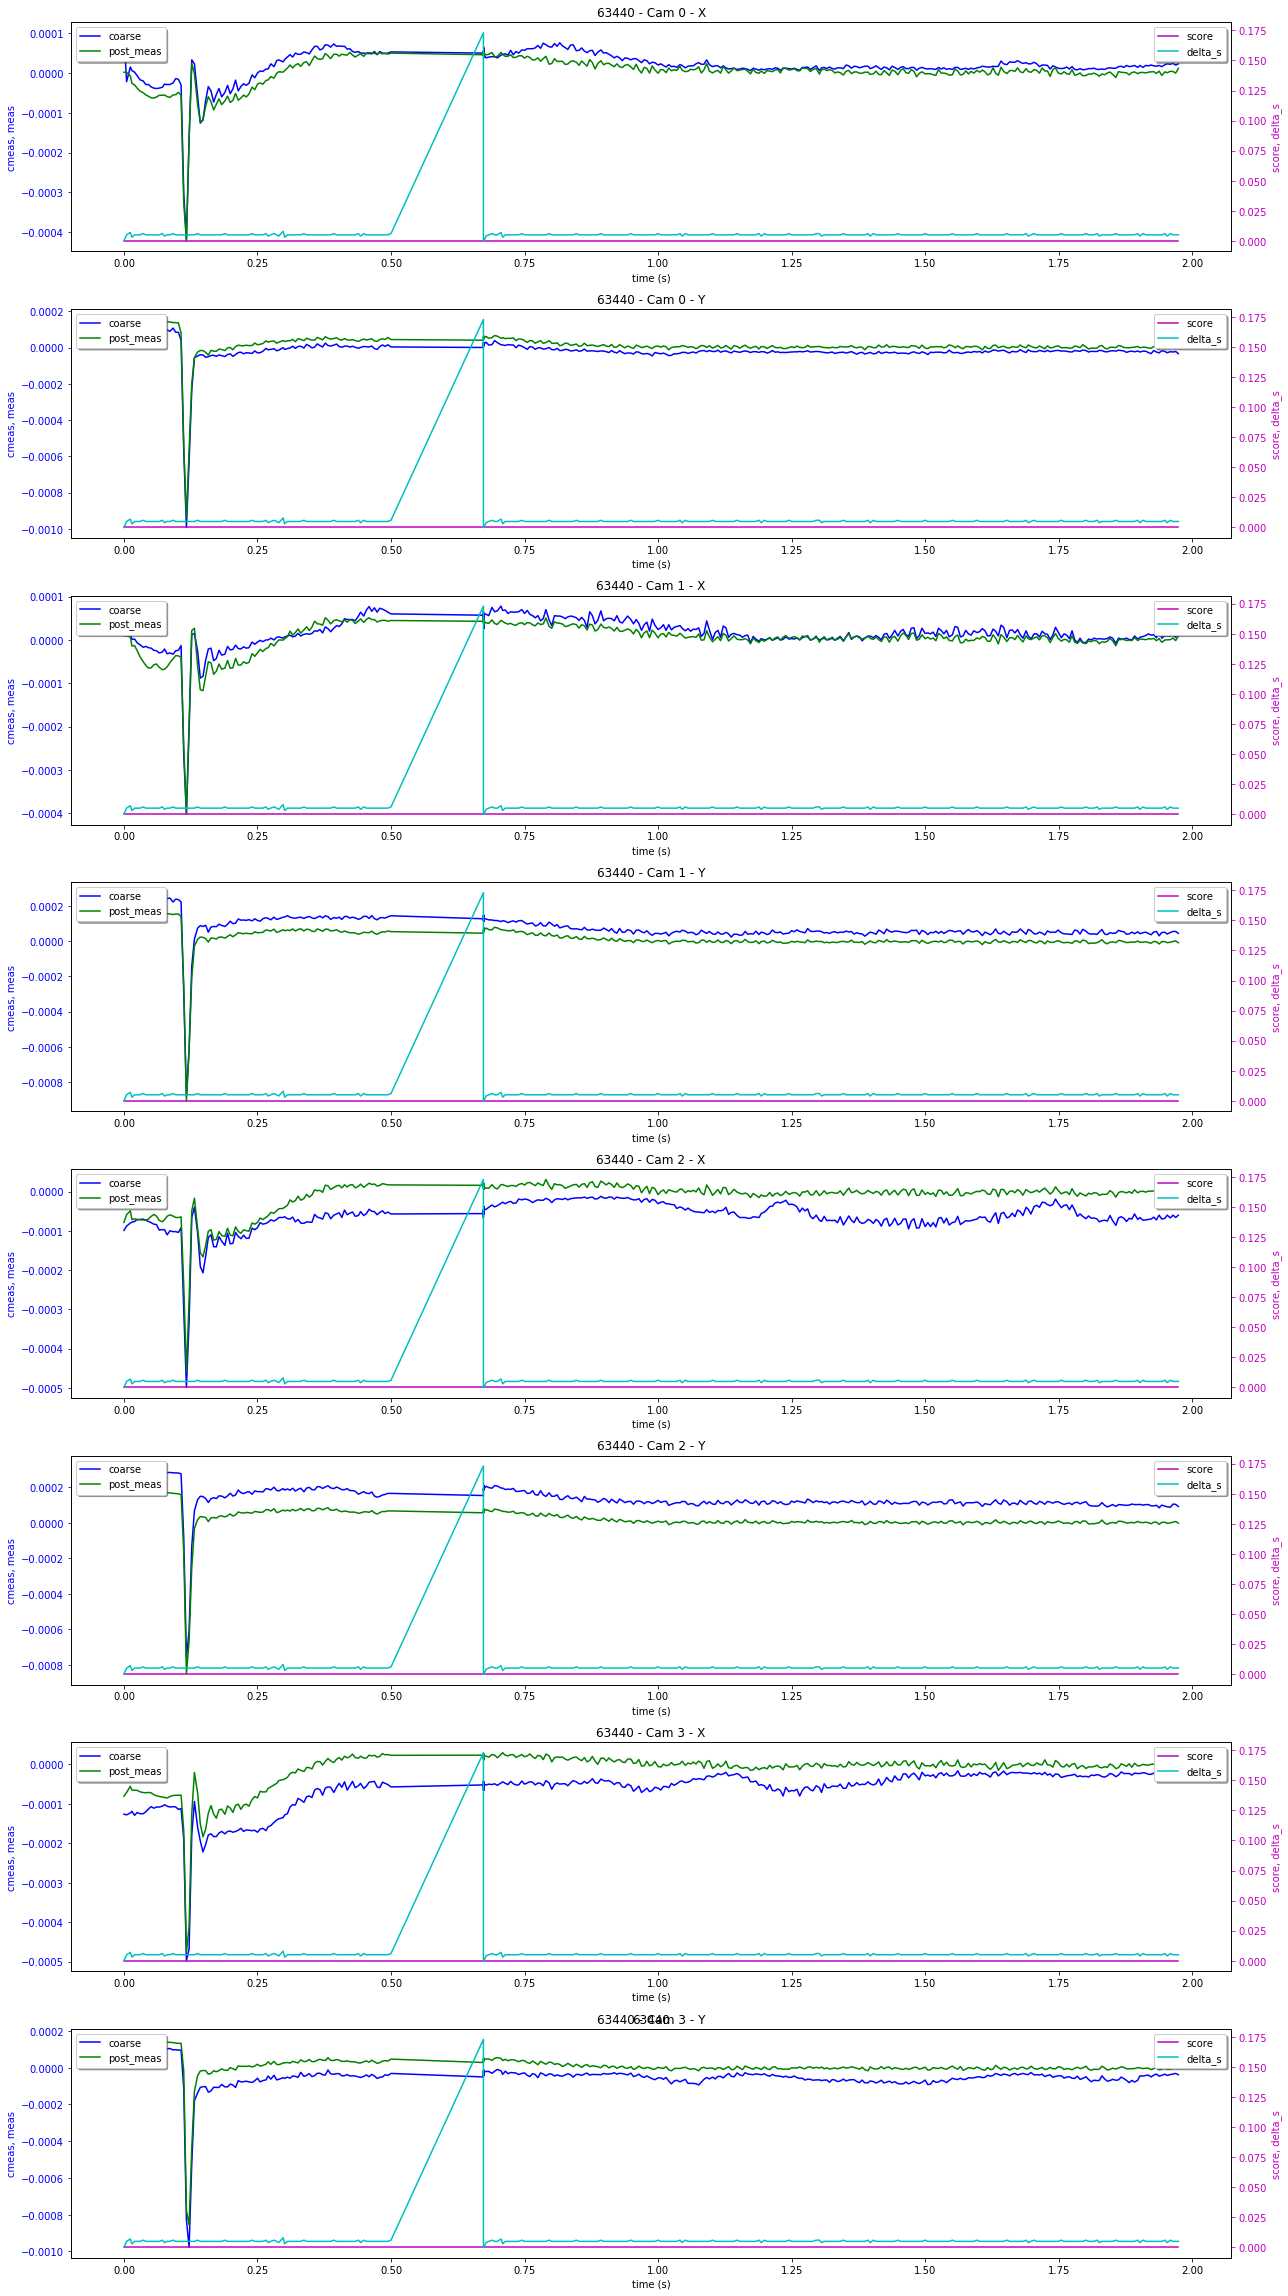

Saving pdf...


In [25]:
# 22: '20.1 <= time_s < 20.4'
# 26: '1 <= time_s < 3'

vib_sets_05_17 = [(22, '30271', '18.1 <= time_s < 22.4'),
            (22, '30271_long', '1 <= time_s < 30'),
            (26, '30279', '1 <= time_s < 3'),
            (26, '30279_before', '1.3 <= time_s < 1.75')]

vib_sets_05_24 = [(0, '30380', '0 <= time_s < 30'),
            (1, '30382', '0 <= time_s < 30'),
            (2, '30384', '0 <= time_s < 30'),
            (3, '30385', '0 <= time_s < 30'),
            (4, '30386', '0 <= time_s < 30')]

#vib_sets = [(5, '30105', '0 <= time_s < 32')]

vib_sets = vib_sets_05_17

vib_sets = [ (0, '63440', '0 <= time_s < 30')]
i = 0
save_pdf = True

df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)

for i in range(len(vib_sets)):
    df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)
    plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )

plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )


In [17]:
df = pd.DataFrame.from_records(data_sets[26], columns=cols)
df_sub = df.query('1.415 <= time_s < 1.735')
#df.describe()

time_s = df_sub['time_s']
df_c0x = df_sub['C0 measx_mm']
df_c0y = df_sub['C0 measy_mm']
df_c1x = df_sub['C1 measx_mm']
df_c1y = df_sub['C1 measy_mm']
df_c2x = df_sub['C2 measx_mm']
df_c2y = df_sub['C2 measy_mm']
df_c3x = df_sub['C3 measx_mm']
df_c3y = df_sub['C3 measy_mm']

print("num pts:", len(df_c0x))

fig, ax1 = plt.subplots(figsize=(18,3))
ax1.plot(time_s, df_c0x,  color='b', label='coarse')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('cmeas, meas', color='b')
ax1.tick_params('y', colors='b')
plt.show()
time_s

IndexError: list index out of range

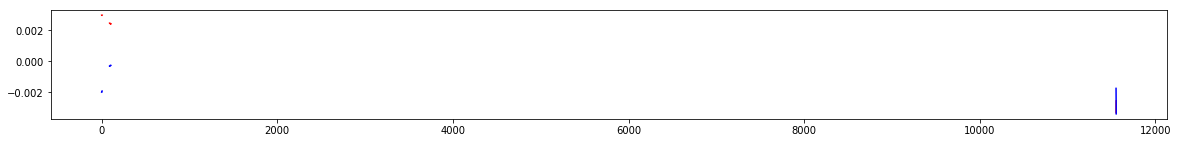

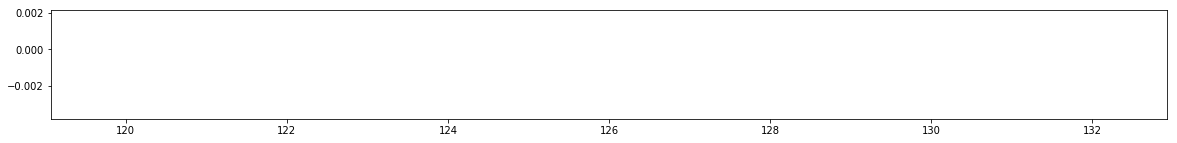

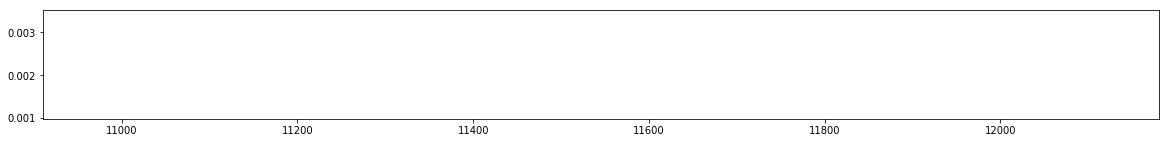

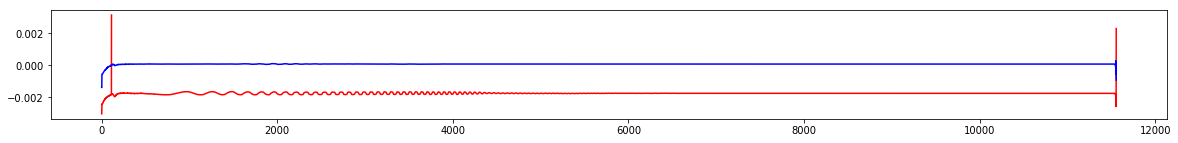

In [82]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 post measx_mm'], color='r')
plt.plot(df['C0 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 post measx_mm'], color='r')
plt.plot(df['C1 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 post measx_mm'], color='r')
plt.plot(df['C2 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 post measx_mm'], color='r')
plt.plot(df['C3 post measy_mm'], color='b')
# plt.vlines(rt_peakIdx, 0, np.max(patch_diff) + 25, color='r')
#plt.title('TTM Data')


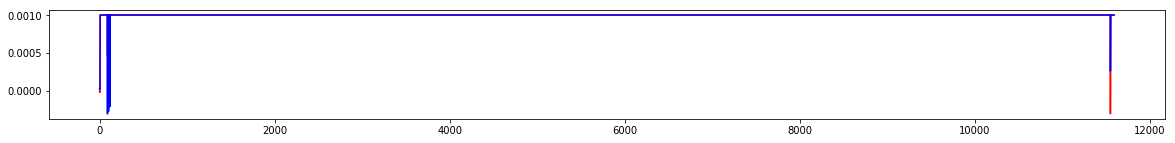

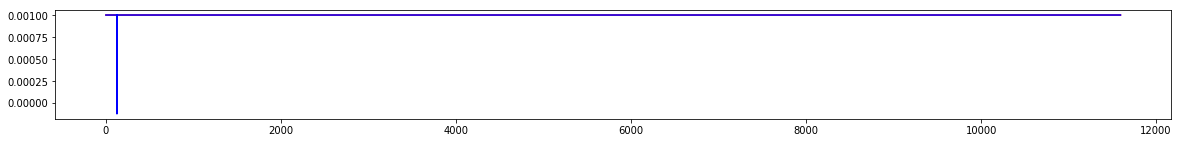

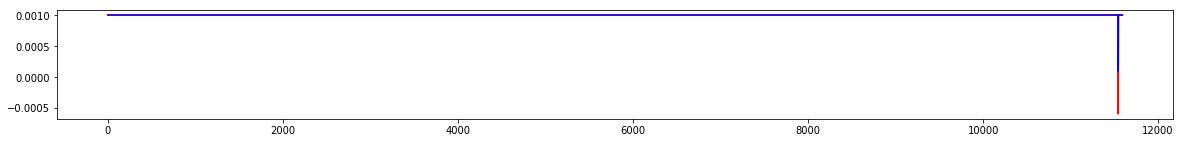

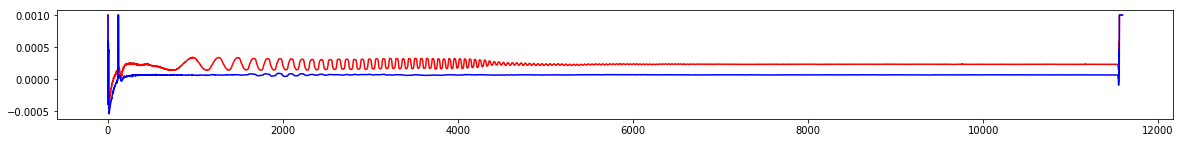

In [73]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 measx_mm'], color='r')
plt.plot(df['C0 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 measx_mm'], color='r')
plt.plot(df['C1 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 measx_mm'], color='r')
plt.plot(df['C2 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 measx_mm'], color='r')
plt.plot(df['C3 measy_mm'], color='b')


In [13]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()
df['Cam3_TimeStamp']

NameError: name 'cols' is not defined

Cam1_TimeStamp
 Mean: 5101.235142
 Std : 1.948697
 Max : 5102.000000
 Min : 5094.000000
Cam2_TimeStamp
 Mean: 5101.255814
 Std : 1.913960
 Max : 5102.000000
 Min : 5094.000000
Cam3_TimeStamp
 Mean: 5101.237726
 Std : 1.949047
 Max : 5102.000000
 Min : 5094.000000
Cam4_TimeStamp
 Mean: 5101.255814
 Std : 1.904486
 Max : 5102.000000
 Min : 5094.000000


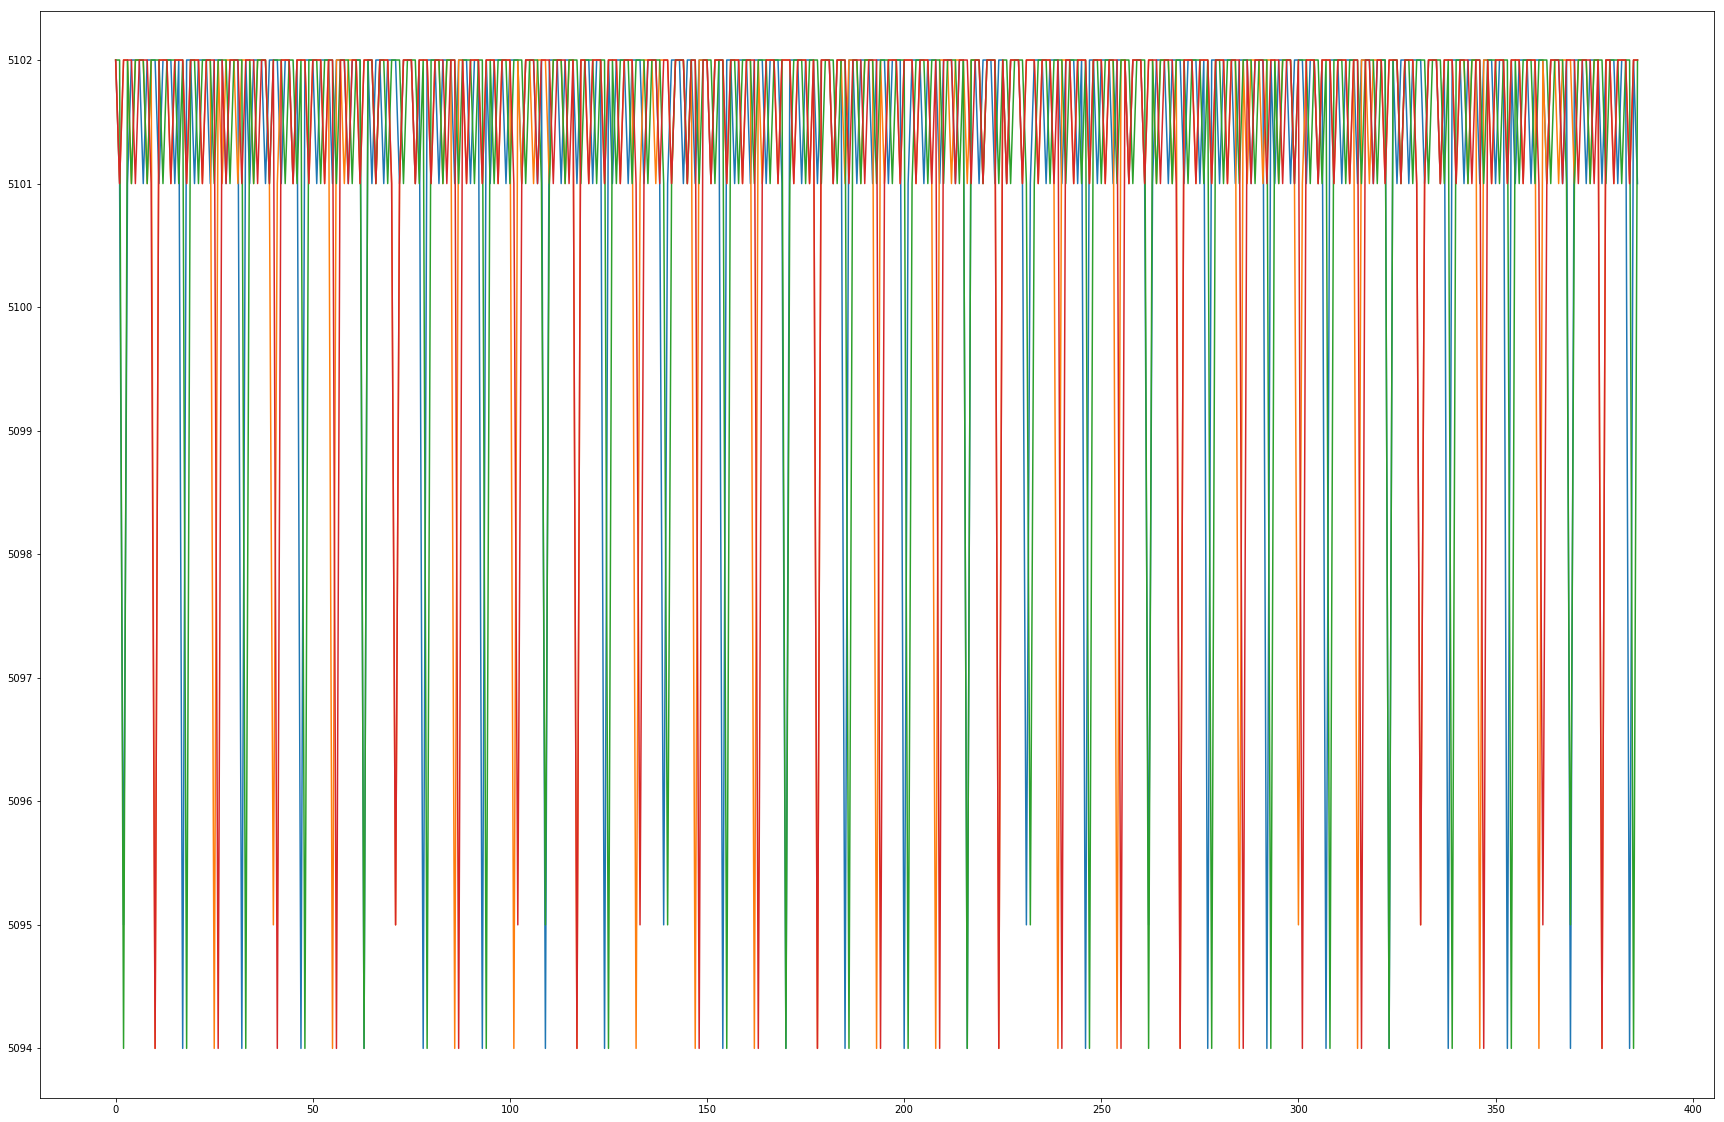

In [26]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()

cols_to_plot = ['Cam1_TimeStamp', 'Cam2_TimeStamp', 'Cam3_TimeStamp', 'Cam4_TimeStamp']
plt.figure(figsize=(30,20))

for col in cols_to_plot:
    print("%s" % col)
    cam_ts_deltas = []
    offset = 0
    for idx, ts in enumerate(df[col]):
        if idx > 0:
            if ts_prev == ts:
                delta = ts - ts_prev
                print("  delta at %d is %d (ts: %d, ts_prev: %d)" % (idx, delta, ts, ts_prev))
            elif ts_prev < ts:
                delta = ts - ts_prev
            else:
                delta = (1e6 - ts_prev) + ts

            cam_ts_deltas.append(delta)

        ts_prev = ts

    plt.plot(cam_ts_deltas)

    cam_ts_deltas_np = np.array(cam_ts_deltas)
    print(" Mean: %f" % cam_ts_deltas_np.mean())
    print(" Std : %f" % cam_ts_deltas_np.std())
    print(" Max : %f" % cam_ts_deltas_np.max())
    print(" Min : %f" % cam_ts_deltas_np.min())
    

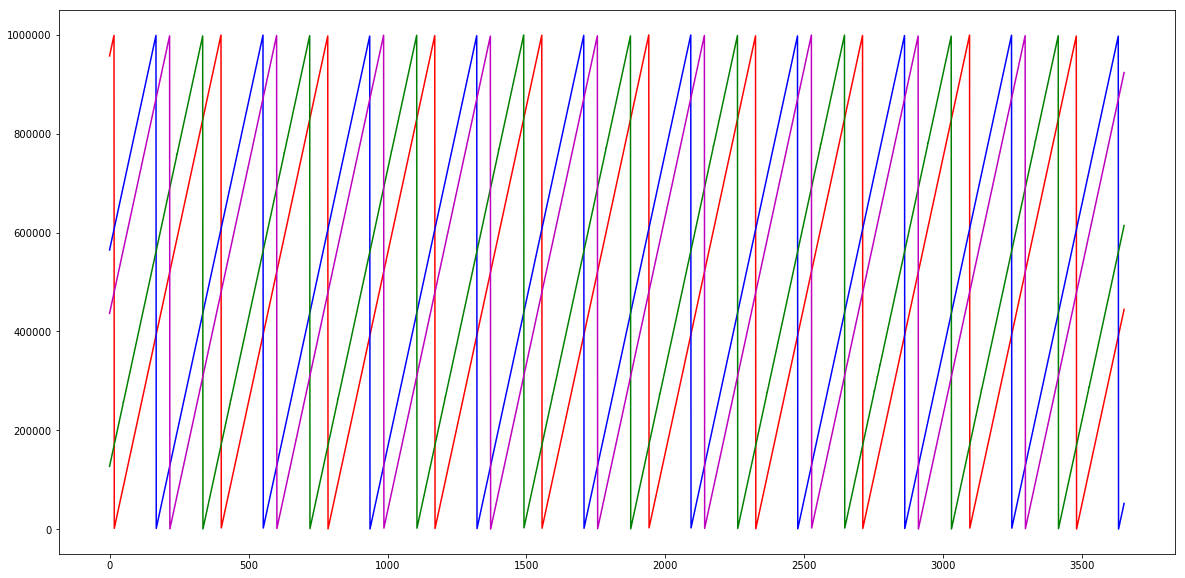

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df['Cam1_TimeStamp'], color='r')
plt.plot(df['Cam2_TimeStamp'], color='b')
plt.plot(df['Cam3_TimeStamp'], color='g')
plt.plot(df['Cam4_TimeStamp'], color='m')
